In [27]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Questions to answer about the dataset
#1. Who were the passengers on the Titanic?(Ages,Gender,Class,...etc)
#2. What deck were the pasengers on and how does that relate to their class?
#3. Where did the passenger come from?
#4. Who was alone and who was with family?
#5. what factors helped soemone survive the sinking?

In [116]:
# import the data as a dataframe
train=pd.read_csv('train.csv')

In [117]:

#Preview of the data
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
# Look at information of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


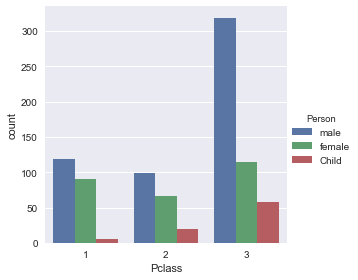

In [233]:
#1. Who were the passengers on the Titanic?(Ages,Gender,Class,...etc)

def male_female_child(passenger):
    age,sex=passenger
    if age < 16:
        return 'Child'
    else:
        return sex

train['Person']=train.loc[:,['Age','Sex']].apply(male_female_child, axis=1)
train['Person'].head(10)
sns.factorplot('Pclass',data=train, hue='Person', kind='count')




Mean
30.0

Person Count 
male      537
female    271
Child      83
Name: Person, dtype: int64


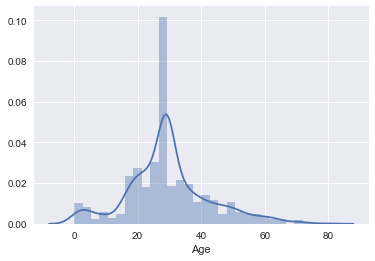

In [229]:
#distribution of age
print 'Mean\n=============\n' + str(round(train['Age'].mean(),0)) +'\n'
train['Age']=train['Age'].fillna(train['Age'].mean())
train['Age']=train['Age'].astype(int)
print 'Person Count \n=============\n' +str(train['Person'].value_counts())
sns.distplot(train['Age']);

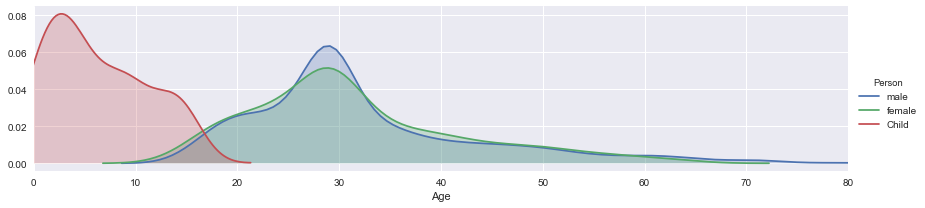

In [222]:

fig=sns.FacetGrid(train,hue='Person',aspect=4,)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


In [312]:
#2. What deck were the pasengers on and how does that relate to their class?

deck=train.loc[:,['Survived','Age','Person','Pclass','Cabin']].dropna()
levels=[]
for level in deck['Cabin']:
    levels.append(level[0])
    

deck['level']=levels

In [313]:
deck.head(3)

,Survived,Age,Person,Pclass,Cabin,level
1,1,38,female,1,C85,C
3,1,35,female,1,C123,C
6,0,54,male,1,E46,E


In [308]:
deck['level'].value_counts()


C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: level, dtype: int64

Observation
It seems the third class were only in deck E and F and that the majority of people where in deck C and in first class


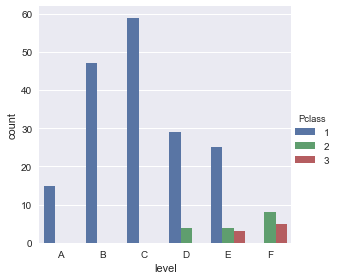

In [182]:
deck=deck[deck['Cabin']!='T']
sns.factorplot('level',data=deck, hue='Pclass',kind='count', order=['A','B','C','D','E','F'])

print'Observation\n===================\nIt seems the third class were only in deck E and F and that the majority of people where in deck C and in first class'

Observation
The majority of people originated from  city S(Southampton) and were in third class


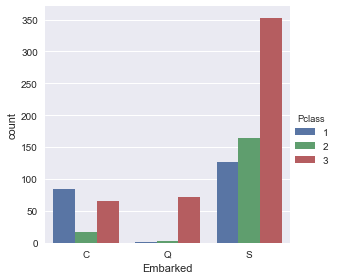

In [186]:
#3. Where did the passenger come from?
sns.factorplot('Embarked',data=train, kind='count', hue='Pclass', order=['C','Q','S'])

print'Observation\n===================\nThe majority of people originated from  city S(Southampton) and were in third class'

In [236]:
#4. Who was alone and who was with family?

train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S,male


In [244]:

train['Alone1']=train['SibSp']+train['Parch']

def alone(alone):
    num=alone
    if num == 0:
        return 'Alone'
    else :
        return 'With Family'
train['Alone2']=train['Alone'].apply(alone)

In [249]:
train['Alone2'].value_counts()

Alone          537
With Family    354
Name: Alone2, dtype: int64

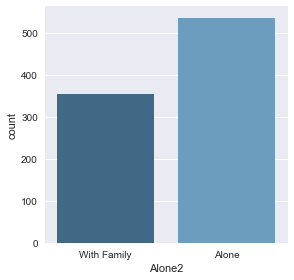

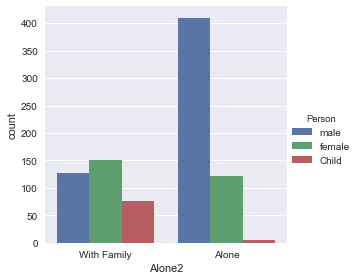

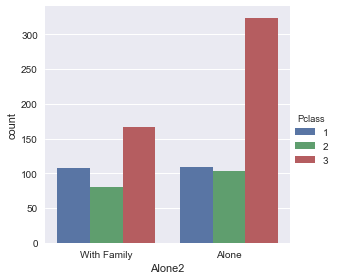

In [266]:
sns.factorplot('Alone2',data=train, kind='count', palette='Blues_d')
sns.factorplot('Alone2',data=train, kind='count', hue='Person')
sns.factorplot('Alone2',data=train, kind='count', hue='Pclass')

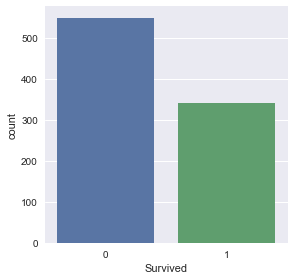

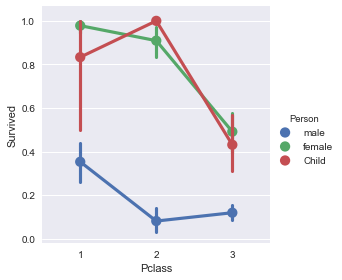

In [279]:
#5. what factors helped soemone survive the sinking?
sns.factorplot('Survived',data=train, kind='count')
sns.factorplot('Pclass','Survived',data=train, kind='point', hue='Person')

In [278]:
#Extra Questions

#1. Did the deck have an effect on the passengers survival rate? Did the answer match up your intituation?
#2. Did having family member increase the odds of surviving the crash?

In [281]:
train['Age'].value_counts()

29    197
24     31
22     27
30     27
28     27
18     26
19     25
21     24
36     23
25     23
32     20
35     18
27     18
26     18
31     17
16     17
23     16
20     16
34     16
40     15
33     15
39     14
45     14
42     13
17     13
38     11
50     10
4      10
2      10
48      9
     ... 
52      6
37      6
43      5
15      5
58      5
60      4
8       4
11      4
62      4
5       4
56      4
61      3
55      3
70      3
65      3
46      3
7       3
6       3
59      2
57      2
64      2
13      2
71      2
10      2
63      2
74      1
66      1
12      1
53      1
80      1
Name: Age, dtype: int64

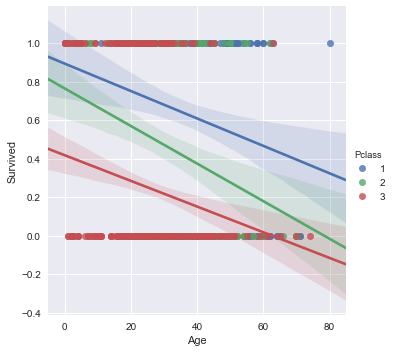

In [302]:

sns.lmplot(x="Age",y="Survived",data=train, hue='Pclass')

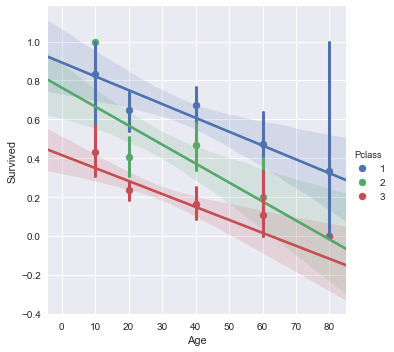

In [303]:
generations=[10,20,40,60,80]
sns.lmplot(x="Age",y="Survived",data=train, hue='Pclass', x_bins=generations)

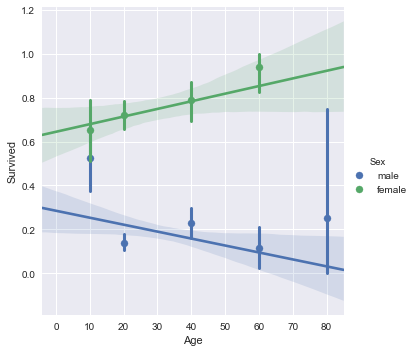

In [305]:
sns.lmplot(x="Age",y="Survived",data=train, hue='Sex', x_bins=generations)

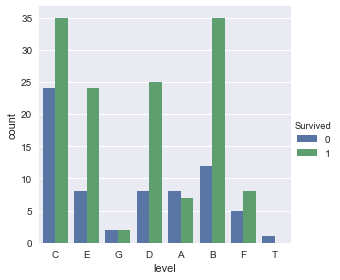

In [323]:
sns.factorplot('level',data=deck, kind='count',hue='Survived')

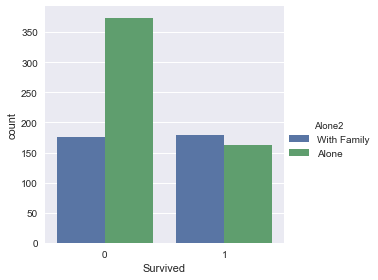

In [328]:
sns.factorplot('Survived',data=train, kind='count',hue='Alone2')